<a href="https://colab.research.google.com/github/MuhammedAshraf2020/ResNet50/blob/main/ImageClassfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import kaggle json file
import google.colab as gc
gc.files.upload()

{}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats

test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
file_name = "train.zip"

with ZipFile(file_name , "r") as Zip:
  Zip.extractall()
  print("Done")

Done


In [4]:
from zipfile import ZipFile
file_name = "test1.zip"

with ZipFile(file_name , "r") as Zip:
  Zip.extractall()
  print("Done")

Done


In [5]:
import os

In [6]:
photos_names = os.listdir("train")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
X_train = list()
y_train = list()

for photo in photos_names:
  Image = plt.imread("train/"+photo)
  Image = cv2.resize(Image , (150 , 150))
  X_train.append(Image)
  if "cat" in photo:
    y_train.append(0)
  else:
    y_train.append(1)

In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(25000, 150, 150, 3)

In [22]:
test_labels = os.listdir("test1")

In [23]:
X_test = list()

for photo in test_labels :
  Image = plt.imread("test1/"+photo)
  Image = cv2.resize(Image , (150 , 150))
  X_test.append(Image)

In [26]:
X_test = np.array(X_test)

In [9]:
import ResNet50  as RS50

In [11]:
model = RS50.ResNet50(input_shape = (150 , 150 , 3) , classes = 2)

In [ ]:
model.summary()

In [14]:
from keras.callbacks import ModelCheckpoint

In [15]:
model_checkpoint_callback = ModelCheckpoint(
    filepath= "/checkpoint",
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

In [16]:
model.compile(optimizer = "adam" , loss = "SparseCategoricalCrossentropy" , metrics = ["accuracy"])

In [ ]:
hist = model.fit(X_train , y_train , epochs = 100  , batch_size = 80 , validation_split = 0.15 , callbacks = [model_checkpoint_callback])

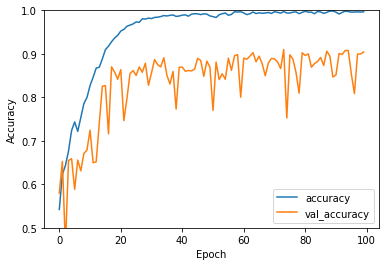

In [18]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [27]:
Preds = model.predict(X_test , batch_size = 80)

In [41]:
indces = {1:"Dog" , 0:"Cat"}

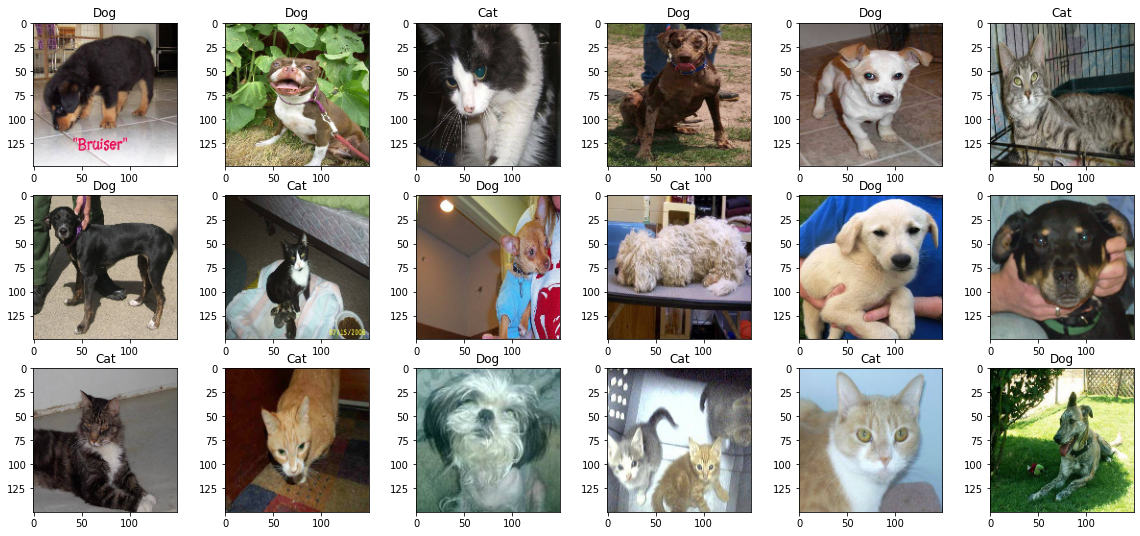

In [95]:
rows = 3
cols = 6
axes=[]
fig=plt.figure(figsize=[ 20 , 9])

for a in range(rows*cols):
    img = X_test[a]
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(indces[np.argmax(Preds[a])])
    axes[-1].set_title(subplot_title)  
    plt.imshow(img)   
plt.show()